In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [7]:
df = pd.read_csv("phones-v1.csv")

<Axes: xlabel='Price Range'>

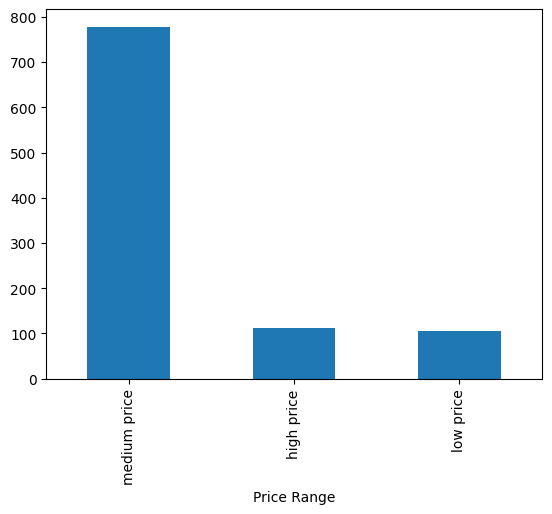

In [8]:
df["Price Range"].value_counts().plot.bar()

In [9]:
df.head()

,Brand,Model,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range
0,Apple,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price
1,Apple,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price
2,Samsung,Samsung Galaxy S9+,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price
3,Samsung,Samsung Galaxy S9+,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price
4,Samsung,Samsung Galaxy S9+,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price


In [10]:
df.describe()

,Storage (GB),RAM (GB),Weight (g),Display Size,Battery (mAh),Year,PPI Density
count,1011.000000,1011.000000,1011.000000,1011.000000,963.000000,1011.000000,1011.000000
mean,262.741840,7.066271,195.870623,6.530208,4537.714434,2021.754698,404.408506
std,215.449536,2.876769,27.198266,0.433248,774.920157,1.492942,69.283178
min,32.000000,2.000000,135.000000,4.700000,1821.000000,2017.000000,179.000000
25%,128.000000,4.000000,185.000000,6.430000,4352.000000,2021.000000,395.000000
50%,256.000000,6.000000,195.000000,6.600000,5000.000000,2022.000000,402.000000
75%,256.000000,8.000000,204.000000,6.700000,5000.000000,2023.000000,458.000000
max,1000.000000,16.000000,627.000000,12.400000,8000.000000,2024.000000,570.000000


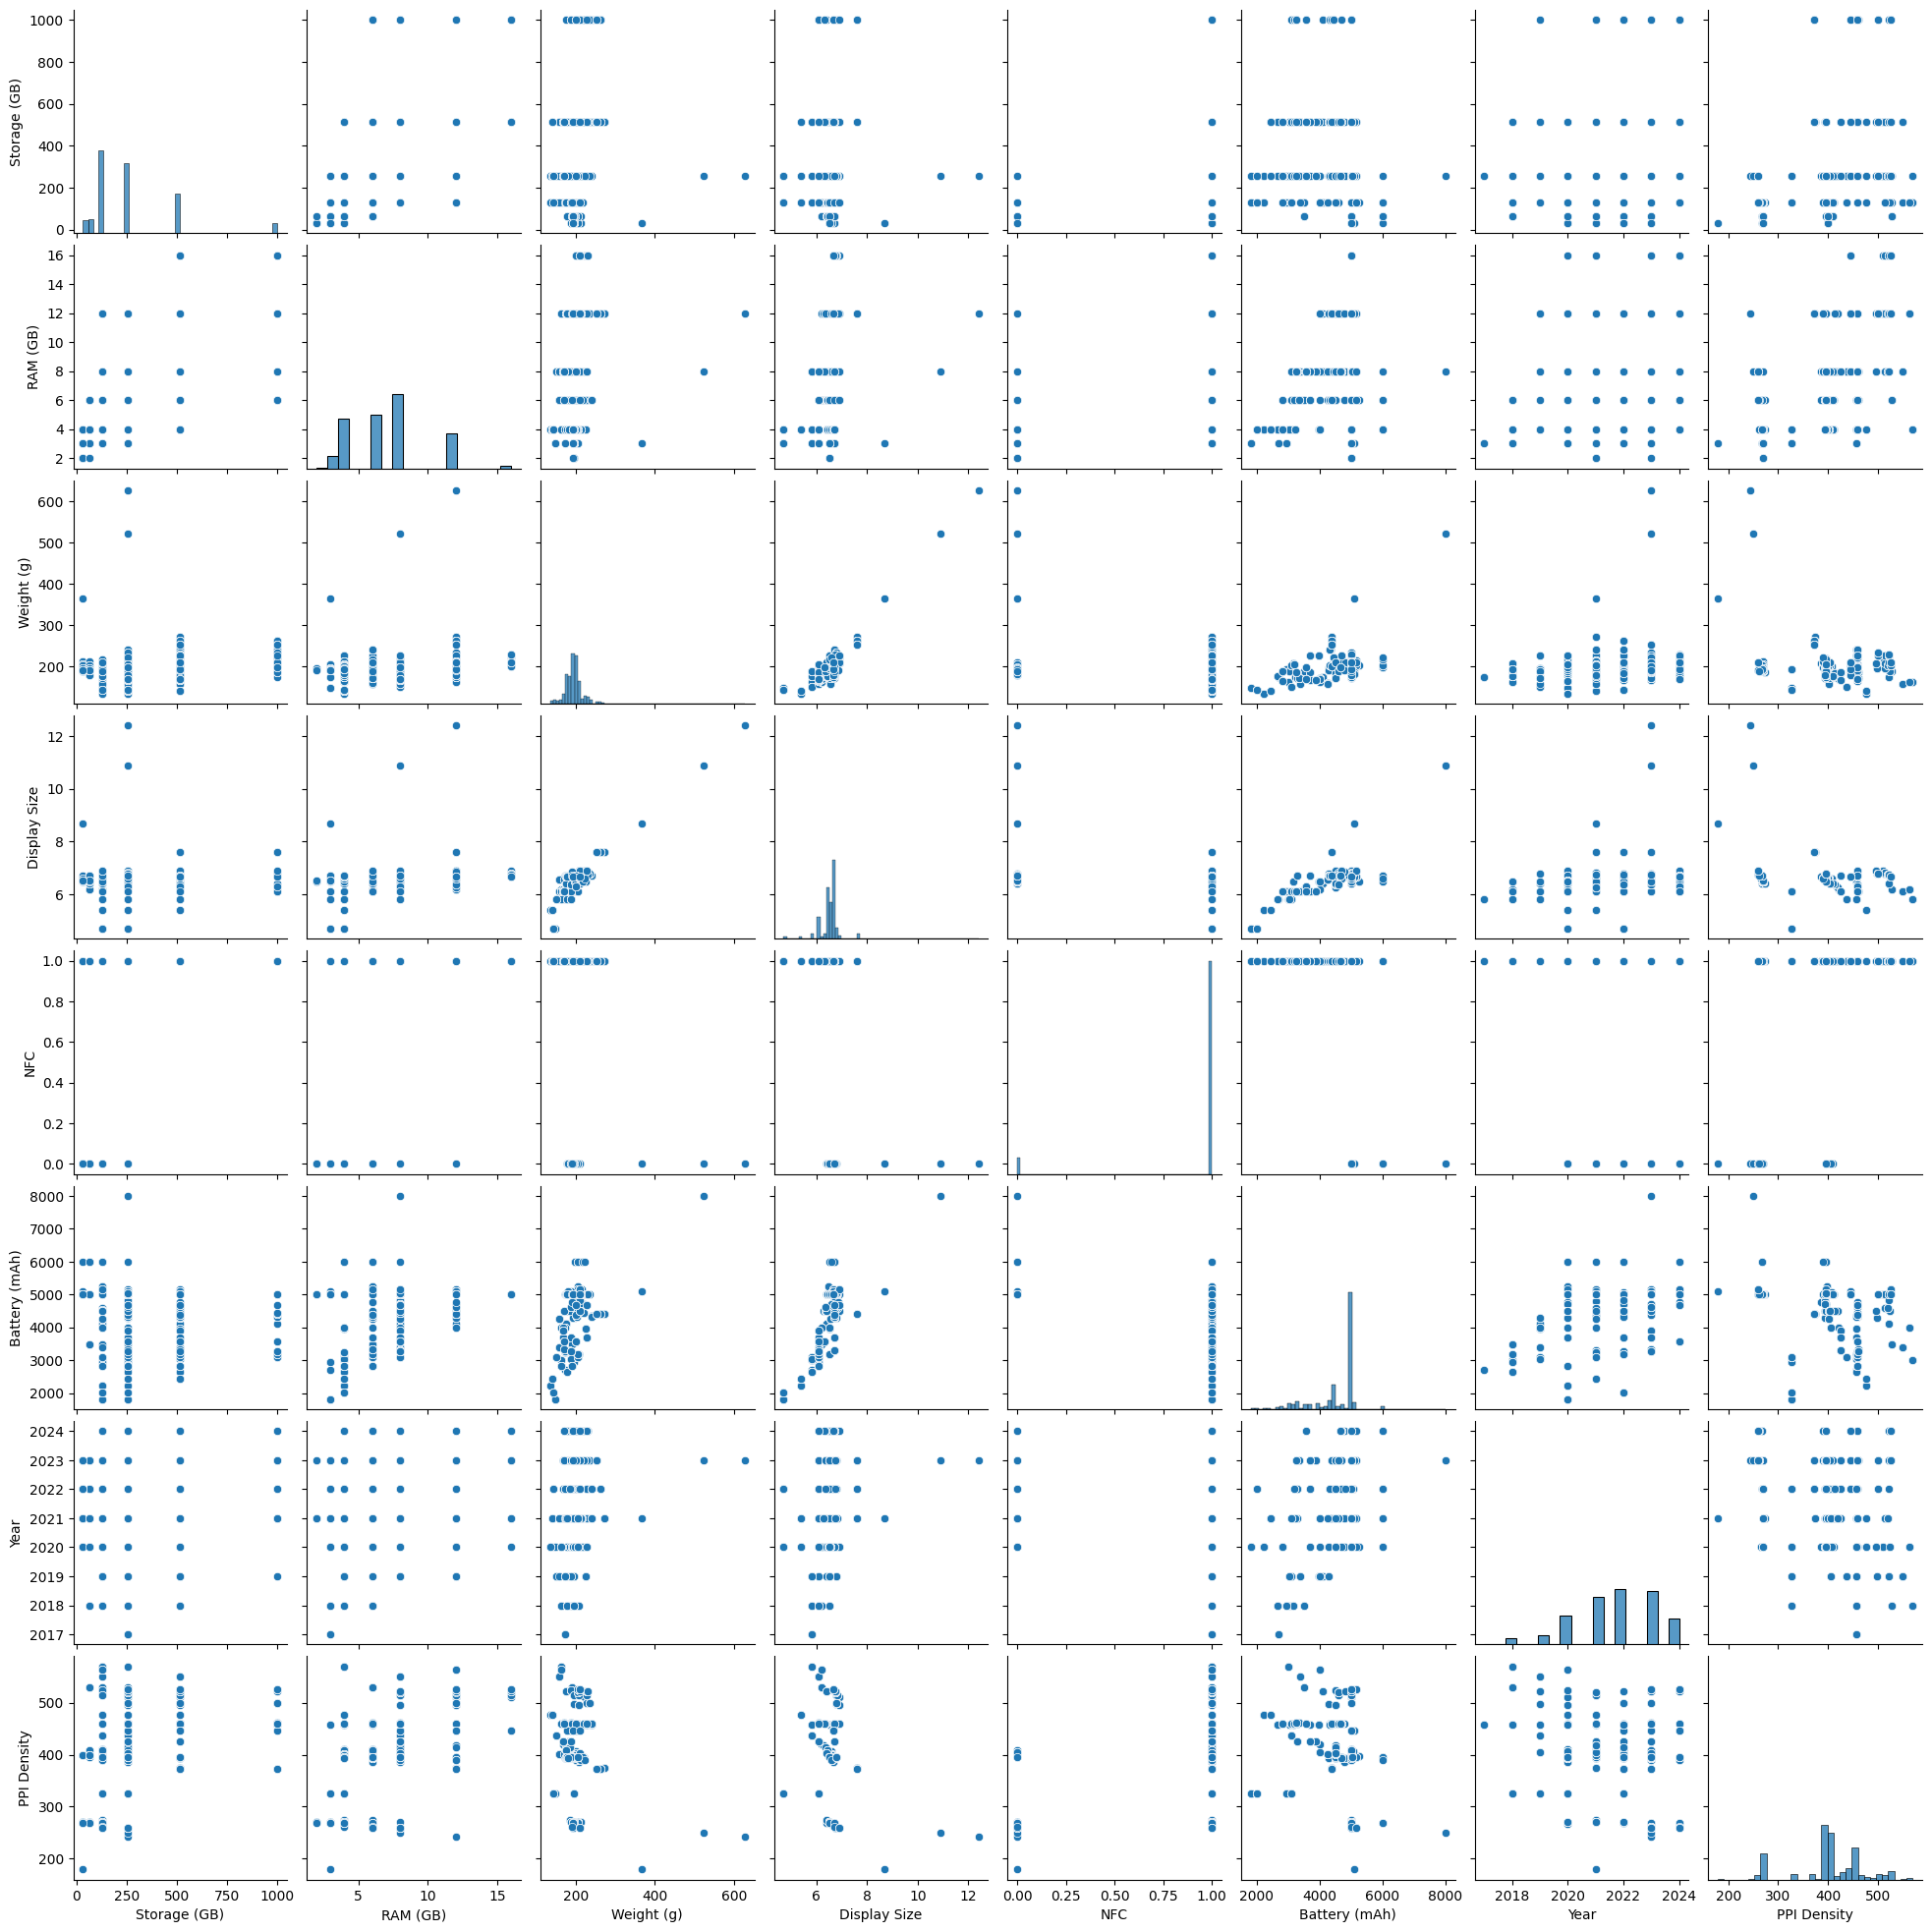

In [11]:
sns.pairplot(df)

<Axes: >

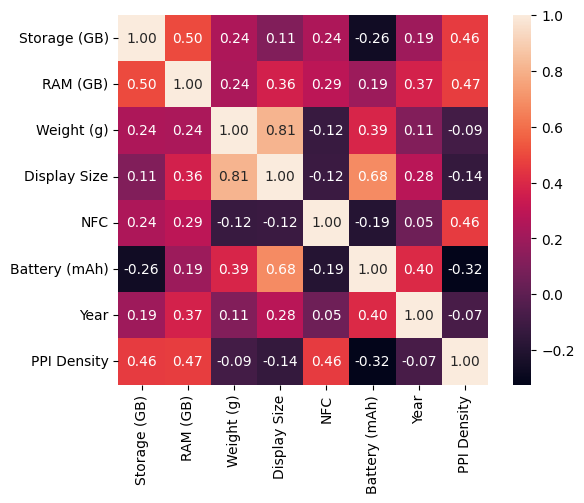

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", square=True)

In [13]:
df.isnull().sum()

Brand             0
Model            65
Storage (GB)      0
RAM (GB)          0
Launch            0
Dimensions        0
Weight (g)        0
Display Type      0
Display Size      0
OS                0
NFC               0
Battery (mAh)    48
CPU               0
Year              0
PPI Density       0
Price Range      15
dtype: int64

In [14]:
df.head()

,Brand,Model,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range
0,Apple,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price
1,Apple,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price
2,Samsung,Samsung Galaxy S9+,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price
3,Samsung,Samsung Galaxy S9+,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price
4,Samsung,Samsung Galaxy S9+,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price


In [10]:
df["Brand"].unique()

array(['Apple', 'Samsung', 'Xiaomi'], dtype=object)

In [15]:
df = pd.concat([df, pd.get_dummies(df["Brand"])], axis=1)  #one hot encoding
df.drop(columns=["Brand"], inplace=True) #nema vishe brand tuku apple samsung xiaomi

In [16]:
df.head()

,Model,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi
0,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False
1,Apple iPhone X,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False
2,Samsung Galaxy S9+,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False
3,Samsung Galaxy S9+,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False
4,Samsung Galaxy S9+,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False


In [13]:
df["Model"].unique().shape

(216,)

In [14]:
df.drop(columns=["Model"], inplace=True)

In [15]:
df.head()

,Storage (GB),RAM (GB),Launch,Dimensions,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi
0,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False
1,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False
2,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False
3,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False
4,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False


In [16]:
df["Launch"].unique().shape

(148,)

In [17]:
df.drop(columns=["Launch"], inplace=True)

In [18]:
df["Dimensions"]

0       143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in)
1       143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in)
2       158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in)
3       158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in)
4       158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in)
                            ...                      
1006    160.9 x 77.8 x 7.8 mm (6.33 x 3.06 x 0.31 in)
1007                  160.5 x 75.1 x 7.8 mm or 8.0 mm
1008    160.4 x 75.1 x 8.4 mm (6.31 x 2.96 x 0.33 in)
1009                  160.5 x 75.1 x 7.8 mm or 8.0 mm
1010    160.4 x 75.1 x 8.4 mm (6.31 x 2.96 x 0.33 in)
Name: Dimensions, Length: 1011, dtype: object

In [17]:
#izvadi go mm i split(x) za h,w,t   ,s ekoj vo float
def preprocess_dimensions(value):    
    if not pd.isna(value):
        values = value.split(" mm")[0].split(" x ")
        return [float(value) for value in values]
    return value

In [18]:
df[["Height", "Width", "Thickness"]] = df["Dimensions"].apply(preprocess_dimensions).tolist()

In [19]:
df.drop(columns=["Dimensions"], inplace=True)

In [20]:
df.head()

,Model,Storage (GB),RAM (GB),Launch,Weight (g),Display Type,Display Size,OS,NFC,Battery (mAh),CPU,Year,PPI Density,Price Range,Apple,Samsung,Xiaomi,Height,Width,Thickness
0,Apple iPhone X,256,3,2017-11-03,174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,high price,True,False,False,143.6,70.9,7.7
1,Apple iPhone X,256,3,2017-11-03,174.0,OLED,5.8,iOS,True,2716.0,Hexa-Core,2017,458,low price,True,False,False,143.6,70.9,7.7
2,Samsung Galaxy S9+,64,6,2018-03-01,189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,low price,False,True,False,158.1,73.8,8.5
3,Samsung Galaxy S9+,128,6,2018-03-01,189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,medium price,False,True,False,158.1,73.8,8.5
4,Samsung Galaxy S9+,256,6,2018-03-01,189.0,AMOLED,6.2,Android,True,3500.0,Octa-Core,2018,529,high price,False,True,False,158.1,73.8,8.5


In [21]:
df["Display Type"].unique()   
#креираш AMOLED, LCD, OLED колони и ја отстрануваш оригиналната.

array(['OLED', 'AMOLED', 'LCD'], dtype=object)

In [22]:
df = pd.concat([df, pd.get_dummies(df["Display Type"])], axis=1)
df.drop(columns=["Display Type"], inplace=True)

In [23]:
df.head()

,Model,Storage (GB),RAM (GB),Launch,Weight (g),Display Size,OS,NFC,Battery (mAh),CPU,...,Price Range,Apple,Samsung,Xiaomi,Height,Width,Thickness,AMOLED,LCD,OLED
0,Apple iPhone X,256,3,2017-11-03,174.0,5.8,iOS,True,2716.0,Hexa-Core,...,high price,True,False,False,143.6,70.9,7.7,False,False,True
1,Apple iPhone X,256,3,2017-11-03,174.0,5.8,iOS,True,2716.0,Hexa-Core,...,low price,True,False,False,143.6,70.9,7.7,False,False,True
2,Samsung Galaxy S9+,64,6,2018-03-01,189.0,6.2,Android,True,3500.0,Octa-Core,...,low price,False,True,False,158.1,73.8,8.5,True,False,False
3,Samsung Galaxy S9+,128,6,2018-03-01,189.0,6.2,Android,True,3500.0,Octa-Core,...,medium price,False,True,False,158.1,73.8,8.5,True,False,False
4,Samsung Galaxy S9+,256,6,2018-03-01,189.0,6.2,Android,True,3500.0,Octa-Core,...,high price,False,True,False,158.1,73.8,8.5,True,False,False


In [24]:
df["OS"].unique()

array(['iOS', 'Android'], dtype=object)

In [25]:
df = pd.concat([df, pd.get_dummies(df["OS"])], axis=1)
df.drop(columns=["OS"], inplace=True)
#Креираш Android и iOS бинарни колони.

In [26]:
df.head()

,Model,Storage (GB),RAM (GB),Launch,Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,...,Samsung,Xiaomi,Height,Width,Thickness,AMOLED,LCD,OLED,Android,iOS
0,Apple iPhone X,256,3,2017-11-03,174.0,5.8,True,2716.0,Hexa-Core,2017,...,False,False,143.6,70.9,7.7,False,False,True,False,True
1,Apple iPhone X,256,3,2017-11-03,174.0,5.8,True,2716.0,Hexa-Core,2017,...,False,False,143.6,70.9,7.7,False,False,True,False,True
2,Samsung Galaxy S9+,64,6,2018-03-01,189.0,6.2,True,3500.0,Octa-Core,2018,...,True,False,158.1,73.8,8.5,True,False,False,True,False
3,Samsung Galaxy S9+,128,6,2018-03-01,189.0,6.2,True,3500.0,Octa-Core,2018,...,True,False,158.1,73.8,8.5,True,False,False,True,False
4,Samsung Galaxy S9+,256,6,2018-03-01,189.0,6.2,True,3500.0,Octa-Core,2018,...,True,False,158.1,73.8,8.5,True,False,False,True,False


In [27]:
df["NFC"] = df["NFC"].astype(int)

#sega site T/F se 1/0
#NFC ја претвораш од boolean (True/False) во integer (1/0) — тоа е важно за модели кои чекаат нумерички вредности.

In [29]:
df.head()

,Model,Storage (GB),RAM (GB),Launch,Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,...,Samsung,Xiaomi,Height,Width,Thickness,AMOLED,LCD,OLED,Android,iOS
0,Apple iPhone X,256,3,2017-11-03,174.0,5.8,1,2716.0,Hexa-Core,2017,...,False,False,143.6,70.9,7.7,False,False,True,False,True
1,Apple iPhone X,256,3,2017-11-03,174.0,5.8,1,2716.0,Hexa-Core,2017,...,False,False,143.6,70.9,7.7,False,False,True,False,True
2,Samsung Galaxy S9+,64,6,2018-03-01,189.0,6.2,1,3500.0,Octa-Core,2018,...,True,False,158.1,73.8,8.5,True,False,False,True,False
3,Samsung Galaxy S9+,128,6,2018-03-01,189.0,6.2,1,3500.0,Octa-Core,2018,...,True,False,158.1,73.8,8.5,True,False,False,True,False
4,Samsung Galaxy S9+,256,6,2018-03-01,189.0,6.2,1,3500.0,Octa-Core,2018,...,True,False,158.1,73.8,8.5,True,False,False,True,False


In [30]:
df["CPU"].unique()

array(['Hexa-Core', 'Octa-Core', 'Quad-Core'], dtype=object)

In [32]:
df["CPU"] = df["CPU"].map({"Quad-Core": 4, "Hexa-Core": 6, "Octa-Core": 8})
#map(...) ги преведува во број (4/6/8), што го прави поле нумеричко и корисно за модели.

In [34]:
df.head()

,Model,Storage (GB),RAM (GB),Launch,Weight (g),Display Size,NFC,Battery (mAh),CPU,Year,...,Samsung,Xiaomi,Height,Width,Thickness,AMOLED,LCD,OLED,Android,iOS
0,Apple iPhone X,256,3,2017-11-03,174.0,5.8,1,2716.0,NaN,2017,...,False,False,143.6,70.9,7.7,False,False,True,False,True
1,Apple iPhone X,256,3,2017-11-03,174.0,5.8,1,2716.0,NaN,2017,...,False,False,143.6,70.9,7.7,False,False,True,False,True
2,Samsung Galaxy S9+,64,6,2018-03-01,189.0,6.2,1,3500.0,NaN,2018,...,True,False,158.1,73.8,8.5,True,False,False,True,False
3,Samsung Galaxy S9+,128,6,2018-03-01,189.0,6.2,1,3500.0,NaN,2018,...,True,False,158.1,73.8,8.5,True,False,False,True,False
4,Samsung Galaxy S9+,256,6,2018-03-01,189.0,6.2,1,3500.0,NaN,2018,...,True,False,158.1,73.8,8.5,True,False,False,True,False


In [38]:
ordinal_encoder = OrdinalEncoder(
    categories=[["low price", "medium price", "high price"]],
    handle_unknown="use_encoded_value",                       #ако се сретне непозната вредност ќе стави NaN.
    unknown_value=np.nan,
)

In [39]:
#OrdinalEncoder ти ги претвора "low price","medium price","high price" во 0.0, 1.0, 2.0 со редоследот што си го дал — бидејќи ова е ordinal (редоследна) променлива.

In [40]:
df[["Price Range"]] = ordinal_encoder.fit_transform(df[["Price Range"]])

In [41]:
df.isnull().sum()

Model              65
Storage (GB)        0
RAM (GB)            0
Launch              0
Weight (g)          0
Display Size        0
NFC                 0
Battery (mAh)      48
CPU              1011
Year                0
PPI Density         0
Price Range        15
Apple               0
Samsung             0
Xiaomi              0
Height              0
Width               0
Thickness           0
AMOLED              0
LCD                 0
OLED                0
Android             0
iOS                 0
dtype: int64

<Axes: >

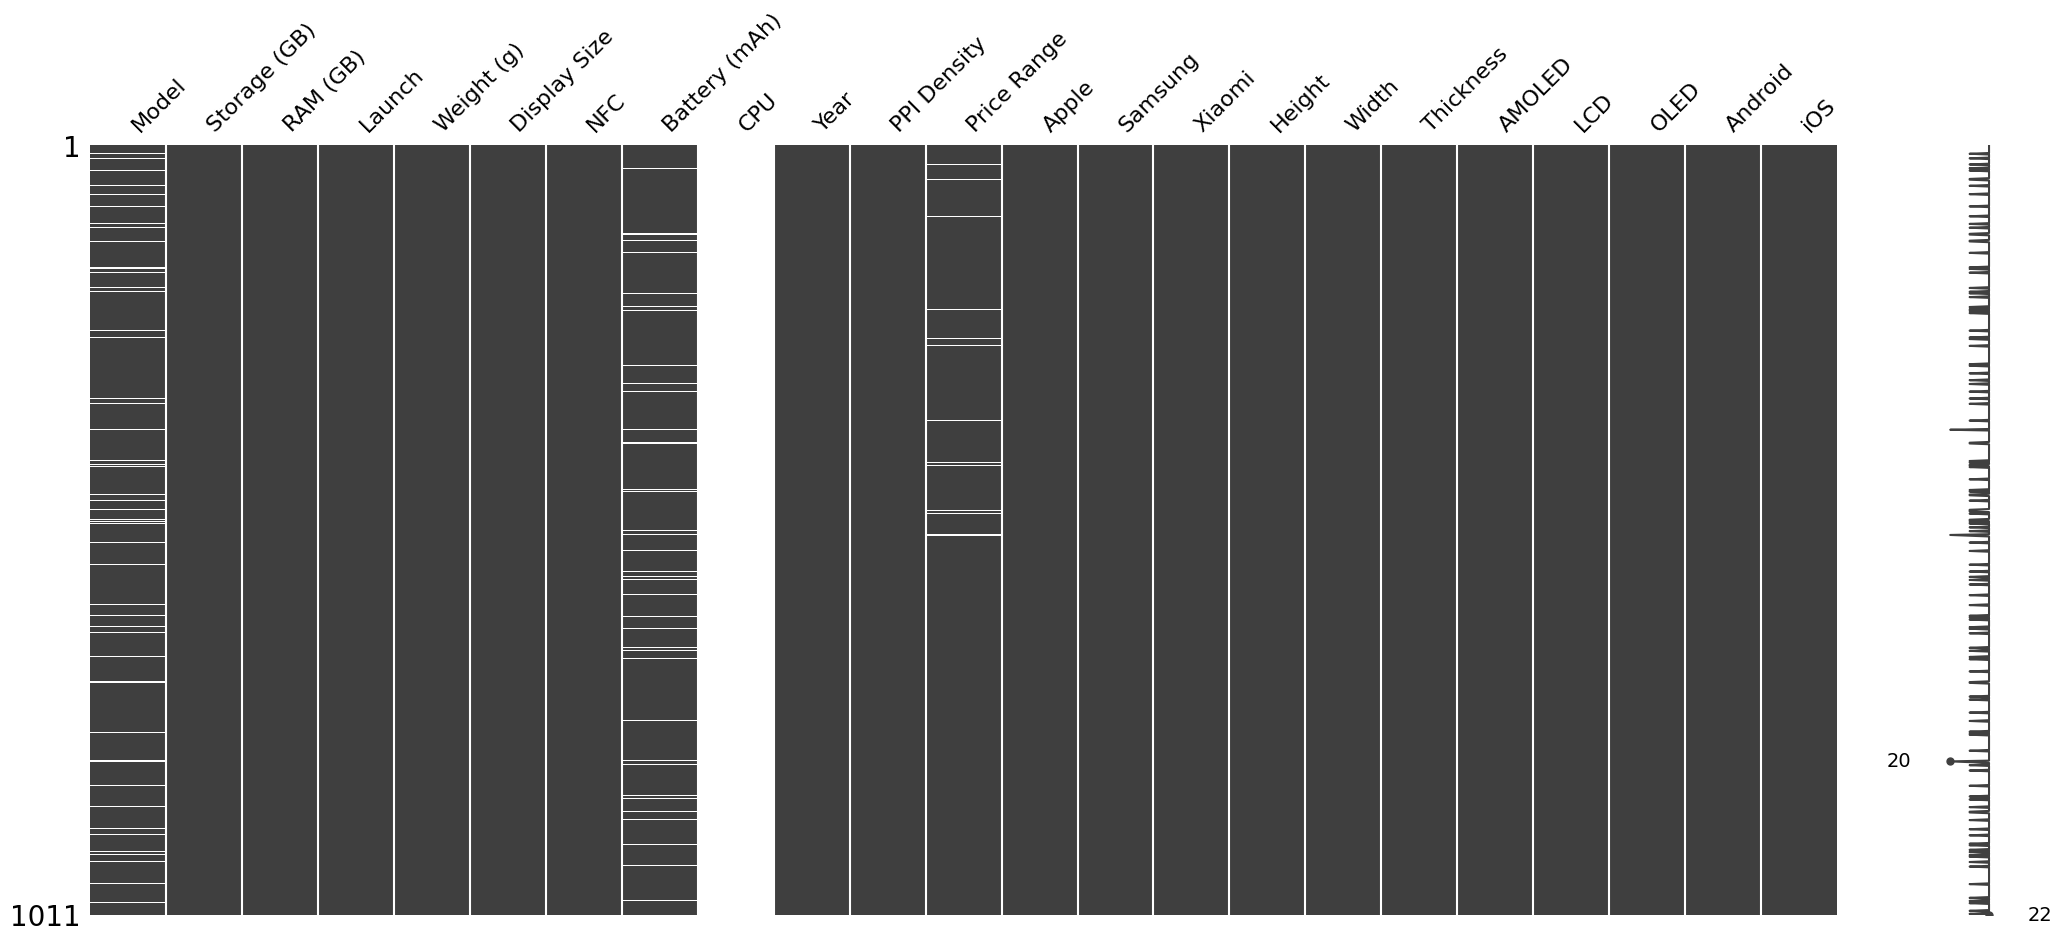

In [45]:
msno.matrix(df)   

<Axes: >

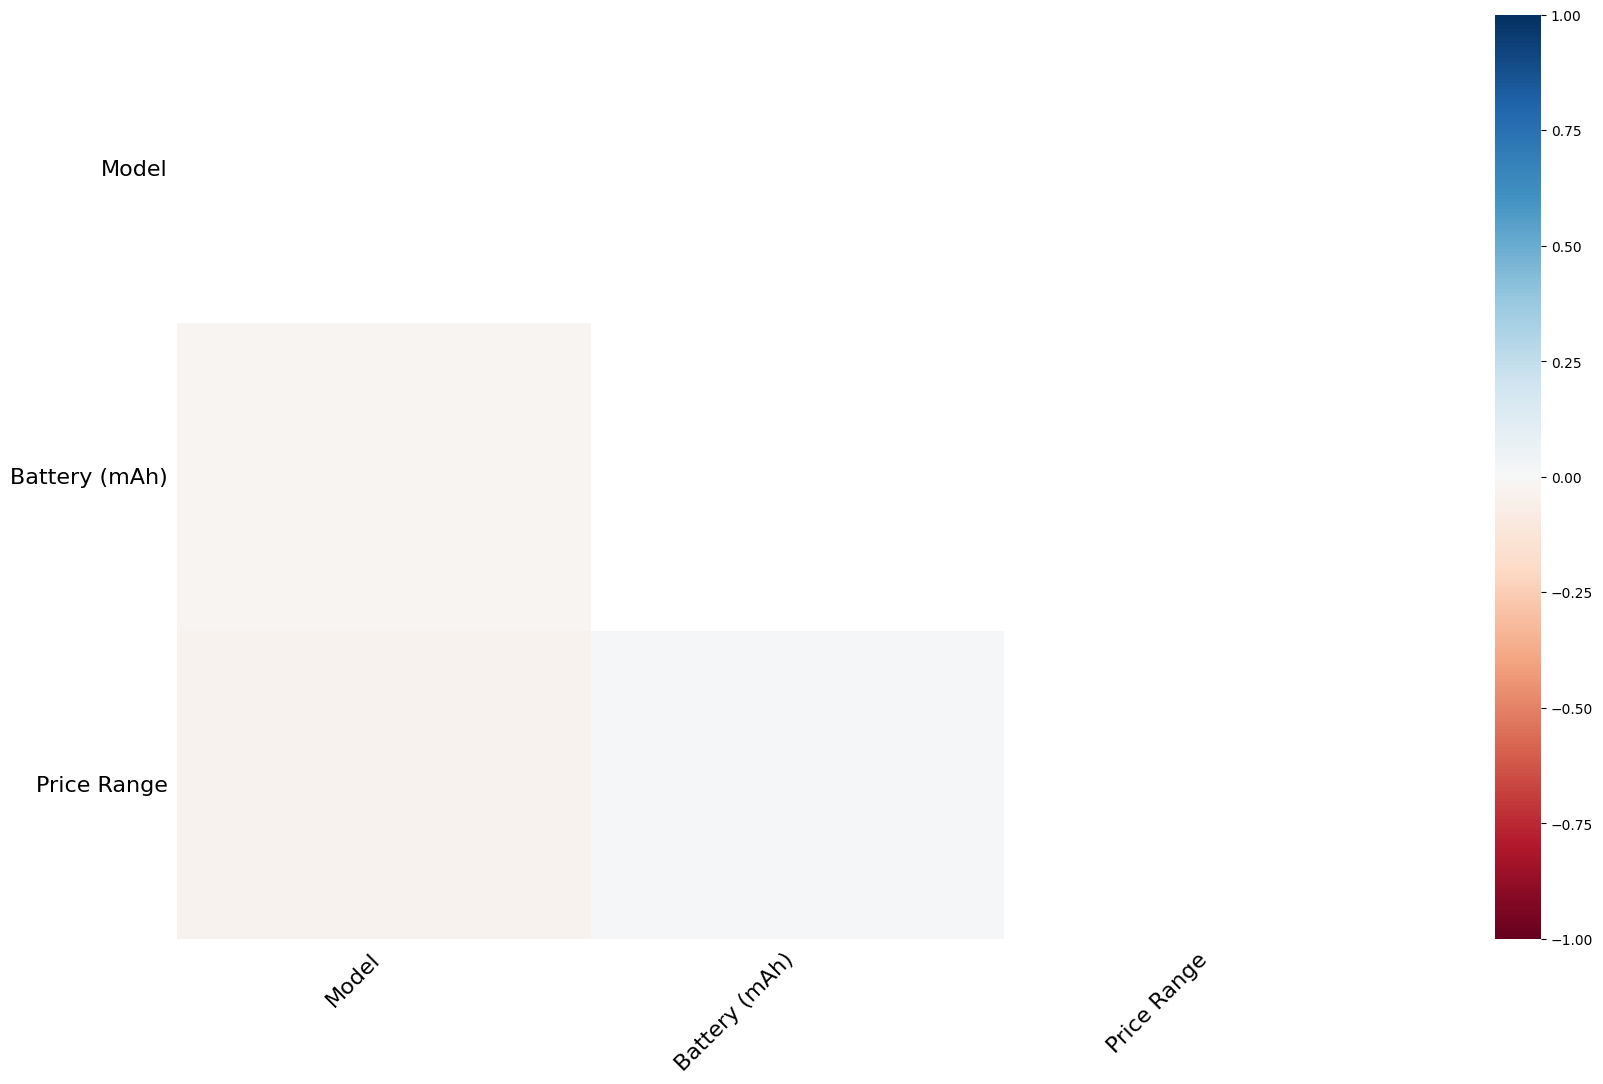

In [46]:
msno.heatmap(df) #визуализација која го покаже корелациското однесување на missingness помеѓу колони.

<Axes: >

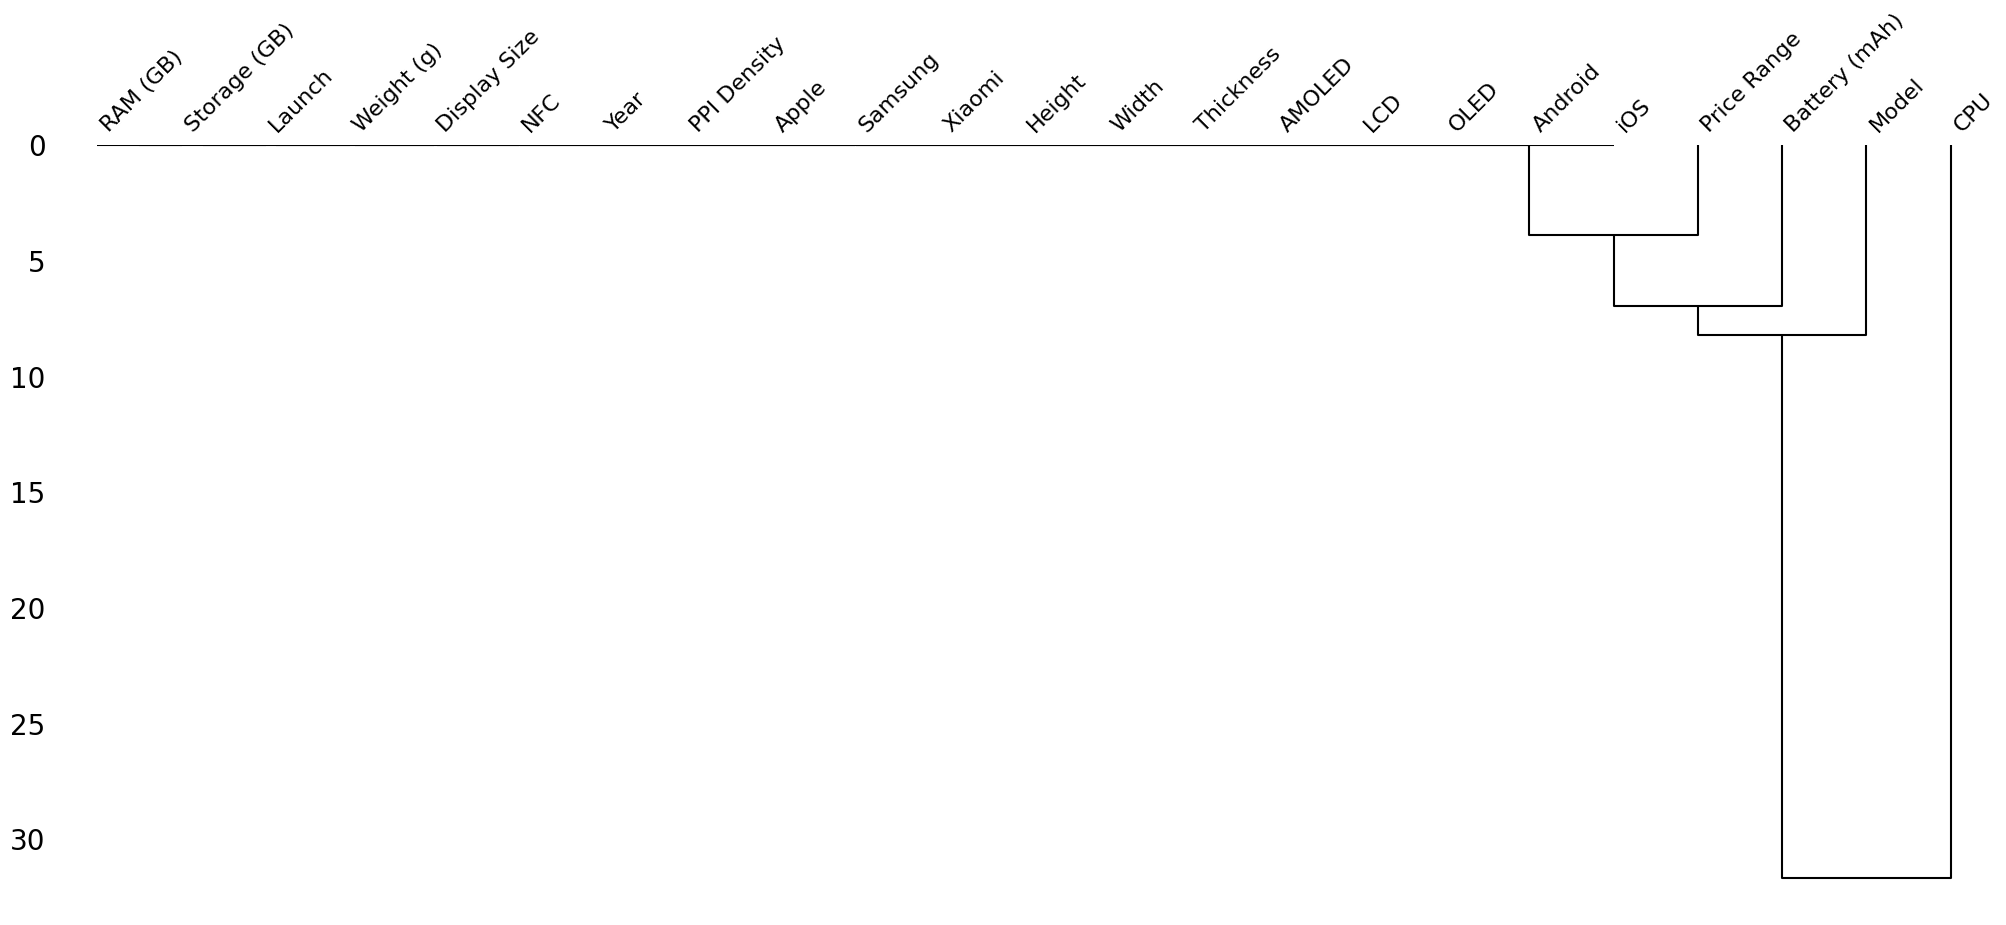

In [47]:
msno.dendrogram(df)   ##clustering на колони врз основа на сличност во missing pattern.

<Axes: >

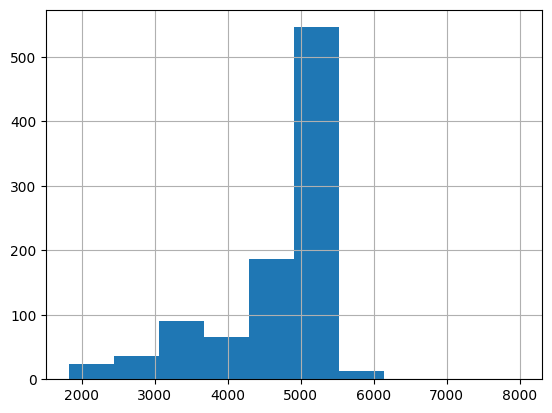

In [48]:
df["Battery (mAh)"].hist()

<Axes: >

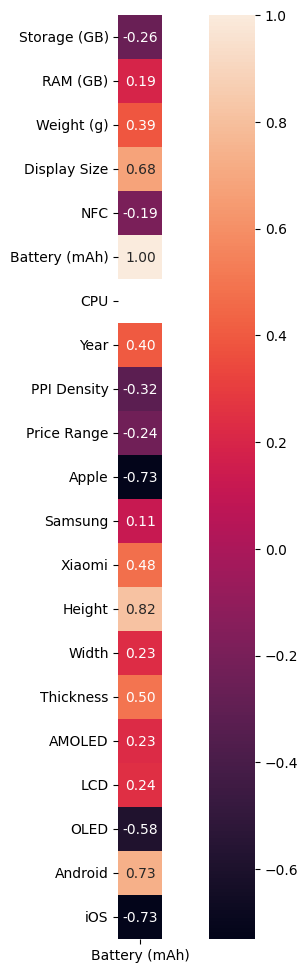

In [49]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only=True)[["Battery (mAh)"]], annot=True, fmt=".2f", square=True)

In [50]:
cols = ["Battery (mAh)", "Display Size", "CPU", "Apple", "Height", "Thickness", "OLED", "Android", "iOS"]

In [54]:
iterative_imputer = IterativeImputer()

In [55]:
#моделски ги предвидува недостасувањата за секоја колона користејќи останатите како предиктори (по редослед).
#ги пополнува (imputes) недостасувањата и заменува оригиналните вредности во DataFrame.

In [56]:
df[cols] = iterative_imputer.fit_transform(df[cols])


C:\Users\pc\PycharmProjects\vnpVezbi\.venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: [2]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Columns must be same length as key

In [57]:
#(НАПОМЕНА: iterative imputer е попрецизен од едноставни методи (mean/median), но бара внимателен избор на колони.)

In [ ]:
#ValueError: Columns must be same length as key
#Пример: ако колоната "CPU" или "Thickness" е целосно NaN → IterativeImputer НЕ МОЖЕ да ја пополни,

#РЕШЕНИЕ 1: Отстрани колони со 100% NaN
#df = df.dropna(axis=1, how="all")

#df[cols] = iterative_imputer.fit_transform(df[cols])


"""РЕШЕНИЕ 2: Извади ја проблематичната колона од cols
Откако ќе видиш која е 100% NaN:
cols.remove("име_на_колоната")"""

In [60]:
df.isnull().sum()

Model             65
Storage (GB)       0
RAM (GB)           0
Launch             0
Weight (g)         0
Display Size       0
NFC                0
Battery (mAh)     47
CPU              996
Year               0
PPI Density        0
Price Range        0
Apple              0
Samsung            0
Xiaomi             0
Height             0
Width              0
Thickness          0
AMOLED             0
LCD                0
OLED               0
Android            0
iOS                0
dtype: int64

In [61]:
df.dropna(subset=["Price Range"], axis=0, inplace=True)
#BRISIME REDOVI OD TARGET 
#Ги бришеш сите редови каде Price Range е NaN — бидејќи target-от е неопходен за supervized учење.

In [62]:
df.isnull().sum()

Model             65
Storage (GB)       0
RAM (GB)           0
Launch             0
Weight (g)         0
Display Size       0
NFC                0
Battery (mAh)     47
CPU              996
Year               0
PPI Density        0
Price Range        0
Apple              0
Samsung            0
Xiaomi             0
Height             0
Width              0
Thickness          0
AMOLED             0
LCD                0
OLED               0
Android            0
iOS                0
dtype: int64

In [ ]:
#ERROR NOT SAME KERNEL

In [63]:
df.shape

(996, 23)

In [64]:
#sega split za train test

In [73]:
"""X = df.drop(columns=["Price Range"]).copy()
y = df["Price Range"].copy()

X = X.apply(pd.to_numeric, errors="ignore")
"""

C:\Users\pc\AppData\Local\Temp\ipykernel_13288\2051939783.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors="ignore")


In [74]:
X, y = df.drop(columns=["Price Range"]), df["Price Range"]

In [75]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [76]:
scaler = MinMaxScaler()

In [77]:
train_X = scaler.fit_transform(train_X)

ValueError: could not convert string to float: 'Xiaomi Poco X3 Pro'

In [70]:
test_X = scaler.transform(test_X)

ValueError: could not convert string to float: 'Xiaomi Redmi Note 12 Pro 4G'

In [71]:
classifier = LogisticRegression().fit(train_X, train_y)

ValueError: could not convert string to float: 'Xiaomi Redmi 9T'

In [ ]:
pred_y = classifier.predict(test_X)

In [72]:
print(classification_report(test_y, pred_y))

NameError: name 'pred_y' is not defined

In [57]:
classifier = KNeighborsClassifier().fit(train_X, train_y)

In [59]:
pred_y = classifier.predict(test_X)

In [60]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.62      0.48      0.54        27
         1.0       0.84      0.90      0.87       156
         2.0       0.38      0.29      0.33        17

    accuracy                           0.79       200
   macro avg       0.62      0.56      0.58       200
weighted avg       0.77      0.79      0.78       200



In [61]:
classifier = DecisionTreeClassifier().fit(train_X, train_y)

In [62]:
pred_y = classifier.predict(test_X)

In [63]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.53      0.63      0.58        27
         1.0       0.86      0.86      0.86       156
         2.0       0.42      0.29      0.34        17

    accuracy                           0.78       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.78      0.78      0.78       200



In [64]:
param_grid = {
    "criterion": ["entropy", "gini"],
    "max_depth": [None, 1, 2, 3, 4],
}

In [65]:
classifier = DecisionTreeClassifier()

In [66]:
grid_search = GridSearchCV(
    classifier,
    param_grid,
    scoring="f1_weighted",
    cv=5,
)

In [67]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 1, 2, 3, 4]},
             scoring='f1_weighted')

In [68]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [69]:
pred_y = grid_search.predict(test_X)

In [70]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.64      0.26      0.37        27
         1.0       0.83      0.94      0.88       156
         2.0       0.55      0.35      0.43        17

    accuracy                           0.80       200
   macro avg       0.67      0.52      0.56       200
weighted avg       0.78      0.80      0.77       200

